# タイタニック復習
## 参考　udemy 実践　python データサイエンス


In [5]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


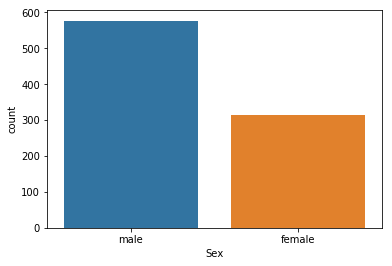

In [6]:
sns.countplot('Sex',data=df)

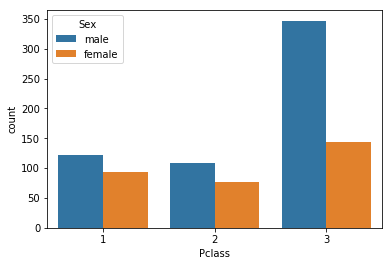

In [9]:
sns.countplot('Pclass',data=df,hue='Sex')

In [10]:
def child(passenger):
    age,sex = passenger
    if age <16:
        return 'child'
    else:
        return sex
df['person'] = df[['Age','Sex']].apply(child,axis=1)

In [12]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


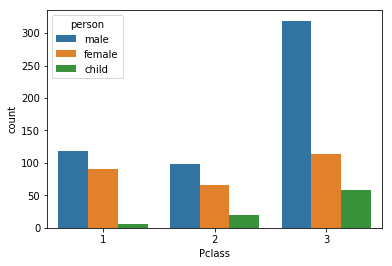

In [13]:
sns.countplot('Pclass',data=df,hue='person')

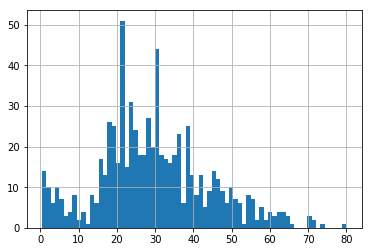

In [14]:
df['Age'].hist(bins=70)

In [15]:
df['Age'].mean()

29.69911764705882

In [16]:
df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

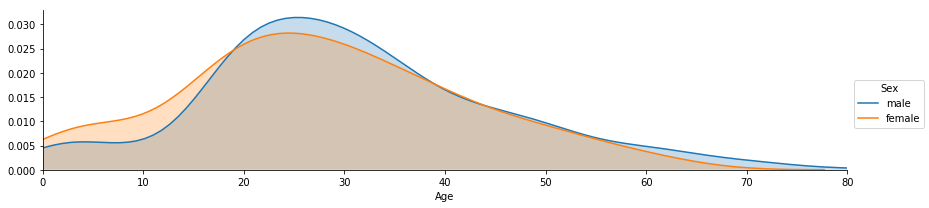

In [17]:
fig = sns.FacetGrid(df,hue='Sex',aspect = 4)
fig.map(sns.kdeplot,'Age',shade = True)
oldest = df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

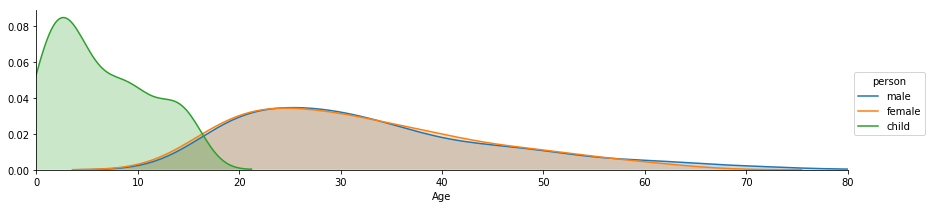

In [18]:
fig = sns.FacetGrid(df,hue='person',aspect = 4)
fig.map(sns.kdeplot,'Age',shade = True)
oldest = df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

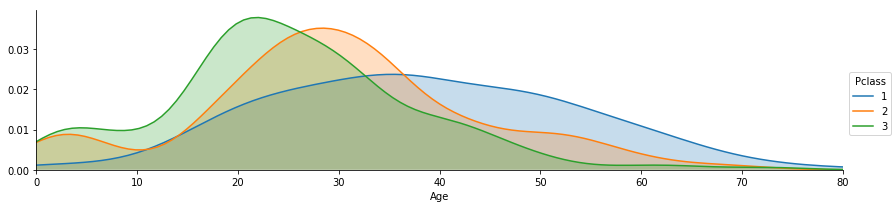

In [19]:
fig = sns.FacetGrid(df,hue='Pclass',aspect = 4)
fig.map(sns.kdeplot,'Age',shade = True)
oldest = df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [20]:
deck = df['Cabin'].dropna()

In [21]:
deck

1              C85
3             C123
6              E46
10              G6
11            C103
21             D56
23              A6
27     C23 C25 C27
31             B78
52             D33
54             B30
55             C52
61             B28
62             C83
66             F33
75           F G73
88     C23 C25 C27
92             E31
96              A5
97         D10 D12
102            D26
110           C110
118        B58 B60
123           E101
124            D26
128          F E69
136            D47
137           C123
139            B86
148             F2
          ...     
751           E121
759            B77
763        B96 B98
765            D11
772            E77
776            F38
779             B3
781            B20
782             D6
789        B82 B84
796            D17
802        B96 B98
806            A36
809             E8
815           B102
820            B69
823           E121
829            B28
835            E49
839            C47
849            C92
853         

In [23]:
levels =[]
for level in deck:
    levels.append(level[0])

In [25]:
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']

In [26]:
cabin_df

,Cabin
0,C
1,C
2,E
3,G
4,C
5,D
6,A
7,C
8,B
9,D


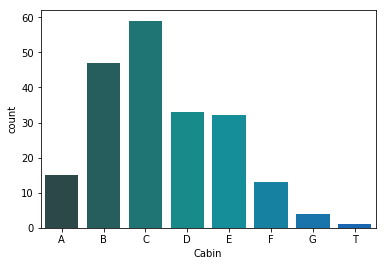

In [27]:
sns.countplot('Cabin',data=cabin_df,palette='winter_d',order=sorted(set(levels)))

In [28]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']

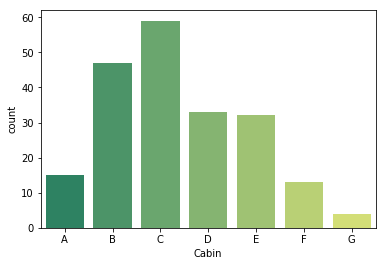

In [29]:
sns.countplot('Cabin',data=cabin_df,palette='summer',order=sorted(set(cabin_df.Cabin)))

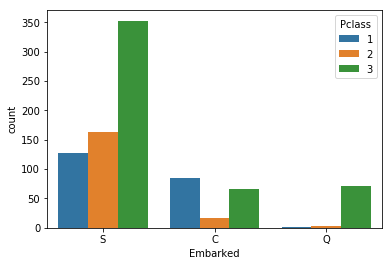

In [30]:
sns.countplot('Embarked', data =df,hue='Pclass')

In [32]:
from collections import Counter

In [33]:
Counter(df.Embarked)

Counter({'S': 644, 'C': 168, 'Q': 77, nan: 2})

In [35]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [36]:
df['Alone']= df.Parch + df.SibSp

In [37]:
df['Alone']

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone, Length: 891, dtype: int64

In [38]:
df['Alone'].loc[df['Alone']>0] = 'With Family'
df['Alone'].loc[df['Alone'] == 0] = 'Alone'

C:\Users\syoun\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


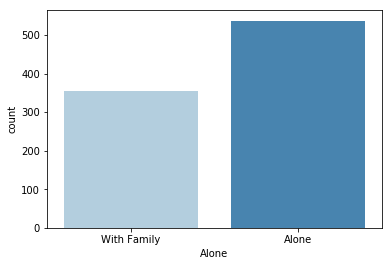

In [43]:
sns.countplot('Alone',data = df,palette='Blues')

In [44]:
df['Survivor'] = df.Survived.map({0:'no',1:'yes'})

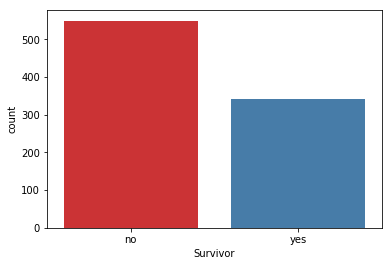

In [46]:
sns.countplot('Survivor',data = df, palette = 'Set1')

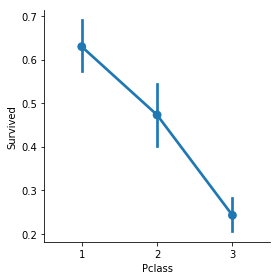

In [47]:
sns.factorplot('Pclass','Survived',data = df,order=[1,2,3])

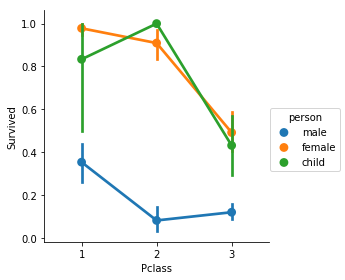

In [48]:
sns.factorplot('Pclass','Survived',data = df,order=[1,2,3],hue = 'person')

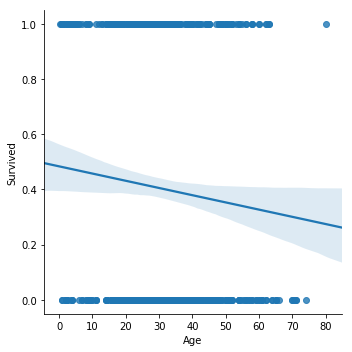

In [49]:
sns.lmplot('Age','Survived',data = df)

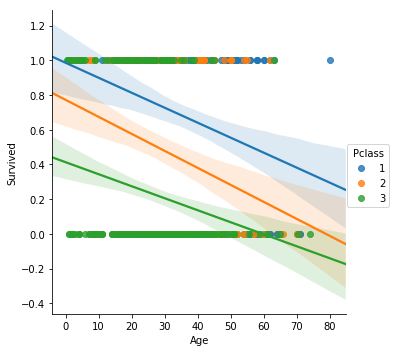

In [50]:
sns.lmplot('Age','Survived',data = df,hue = 'Pclass')

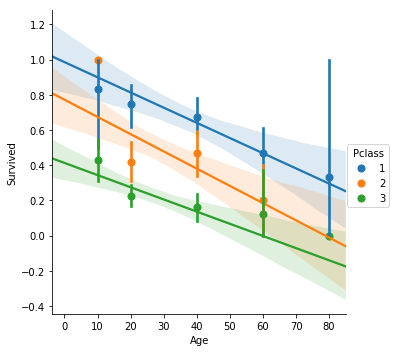

In [51]:
gene = [10,20,40,60,80]
sns.lmplot('Age','Survived',data = df,hue = 'Pclass', x_bins = gene)

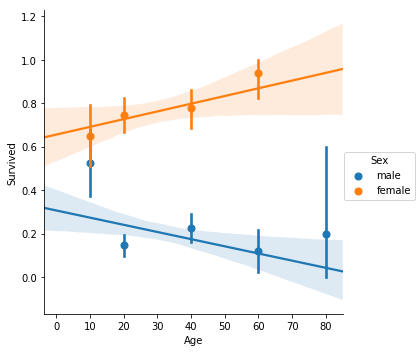

In [52]:
sns.lmplot('Age','Survived',data = df,hue = 'Sex', x_bins = gene)